In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [7]:
def Model1_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, gamma_1, gamma_2, gamma_3, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_Job = 0 
    
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_Job = 0 
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_Job = 0 
    
    
    
    # Initalise vector to store the time 
    Time_v = []
    
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*4)
    if(lambda_1 > 0):
        EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    else:
        EC[0] = TERM+1
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        #print(EC)
        iteration +=1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        

        # Next event is arrival of a CE
        if(ENEXT==0):
           # print('CE arrival')
            
            # Increase CE arrivals by 1 
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):
                
                
                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        #print('CE matches with job')
                        # CE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE and job matches by 1
                        Matches_CE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                
                        break
                
            # If there are no matches found or possible then CE joins the queue 
            if(m == 0):
              #  print('No match join queue')
                # update EC to inlude abandonment time of that CE 
                EC=np.insert(EC, (4+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_1)))
                
                # Joins queue 
                Q1 += 1
                
                
                
            # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        
        
        # Next event is arrival of a EE
        elif(ENEXT==1):
           # print('EE arrival')
            
            # Increase EE arrivals by 1 
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):

                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                       # print('EE matches with job')
                        # EE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and job matches by 1
                        Matches_EE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                        break
                
            # If there are no matches found or possible then EE joins the queue 
            if(m == 0):
              #  print('No match join queue ')
                # update EC to inlude abandonment time of that EE 
                EC=np.insert(EC, (4+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_2)))
    
                
                # Joins queue 
                Q2 += 1
                
            
                
                
            # Update EC to include next arrival time of EE
            EC[1]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_2)
            
        # Next event is arrival of job 
        elif(ENEXT == 2):
          #  print('Job arrival')
            
            # Initialise matches to be 0 
            m = 0 
            
            # Increase arrivals by 1
            Arrivals_Job += 1
            
            # CE > EE so first check if there are matches with CE
            if(Q1 > 0):
                
                # Loop through each CE and check for a match
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-r (probability of matching) then a match is found
                    if(u < (1-r1)):
                        
                        # Job Matches and leaves the system with the CE
                       # print('Job Matches with CE')
                        m += 1 
                        Q1 -= 1
                        
                        # Increase matches of job and CE by 1 
                        Matches_Job += 1
                        Matches_CE += 1 
                        
                        # Update event calender to remove abandonment time of the CE 
                        EC = np.delete(EC, (4+i))
                        break 
                        
            # If job didnt match with CE and there are EEs check for match
            if(Q2 > 0 and m == 0):
                
                # Loop through each EE and check for a match 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-2 (probability of matching) then a match is found
                    if(u < (1-r2)):
                      #  print('Job matches with EE')
                        # Job Matches and leaves the system with the EE
                        
                        m += 1 
                        Q2 -= 1
                        
                        # Increase matches of job and EE by 1 
                        Matches_Job += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the EE 
                        EC = np.delete(EC, (4+Q1+i))
                        break
            # If no CE or EE to match or no match found, then job joins the job queue  
            if(m == 0):
             #   print('No match join queue')
                # Update EC to include abandonment time of the job
                EC = np.insert(EC, (4+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_3)))
                # Job joinss job queue 
                Q3 += 1 
                
            # Update event calander to include next arrival of job 
            EC[2]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is abandonment of CE
        elif((ENEXT>3) and (ENEXT<=(3+Q1))):
          #  print('CE abandonment')
            # Q1 decreases by 1 
            Q1 -= 1
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        # If next event is an abandonment of EE (Q2)
        elif((ENEXT>(3+Q1)) and (ENEXT<=(3+Q1+Q2))):
          #   print('EE abandonment')
            # Q2 decreases by 1 
             Q2 -= 1
            # Abandonment Increases by 1
             Abandonment_EE += 1
            # Remove abandonment time from event calendar 
             EC = np.delete(EC, ENEXT)
            #print('Q2 abandonment')
            #print(EC)
        
        # Next event is abandonment of Job (Q3)
        elif((ENEXT>(3+Q1+Q2)) and (ENEXT<=(3+Q1+Q2+Q3))):
            # Q3 decreases by 1
            Q3 -= 1
             # Abandonment increases by 1
            Abandonment_Job += 1
             # Remove abandonment time from event calendar
            EC = np.delete(EC, ENEXT)
             
        
             
    T_Q = AQ1+AQ2+AQ3  
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_Job > 0):
        JobMatchRate = Matches_Job/Arrivals_Job
        JobAbandonRate = Abandonment_Job/Arrivals_Job
    else:
        JobMatchRate = 0
        JobAbandonRate = 0 
    if(Arrivals_CE +Arrivals_EE+Arrivals_Job > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    
    
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_Total= T_Q/TERM
    

    
     return Av_AQ1, Av_AQ2, Av_AQ3, CEMatchRate, EEMatchRate, JobMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JobAbandonRate, TotalAbandonRate , Av_Total



             
             

        
        
                
                        
            
                
                
        

In [20]:
print(datetime. now())
Abandonment_time = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] 

CE_Match_rates = []
EE_Match_rates = []
Job_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
Job_Abandon_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
Job_Queue_length = []
Total_Queue_length = []



for i in range(len(Abandonment_time)):
    print(Abandonment_time[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    Job_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    Job_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    Job_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(10):
        print(j)
        print(datetime. now())
        rep_results=Job_sim(0.75, 0.5, 0.5, 0.5, 1, 0.1, 0.1, Abandonment_time[i], 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[3])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[4])
        Job_Rep_m_rate = np.append(Job_Rep_m_rate, rep_results[5])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[6])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[7])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[8])
        Job_Rep_a_rate = np.append(Job_Rep_a_rate, rep_results[9])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[10])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        Job_Rep_q_length = np.append(Job_Rep_q_length, rep_results[2])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[11])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    Job_Match_rates = np.append(Job_Match_rates, np.average(Job_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    Job_Abandon_rates = np.append(Job_Abandon_rates, np.average(Job_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    Job_Queue_length = np.append(Job_Queue_length, np.average(Job_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(Job_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(Job_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(Job_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-06 16:15:17.799033
0.1
0
0
2023-08-06 16:15:17.800429
1
2023-08-06 16:15:23.966860
2
2023-08-06 16:15:29.507844
3
2023-08-06 16:15:35.673664
4
2023-08-06 16:15:42.567044
5
2023-08-06 16:15:47.799394
6
2023-08-06 16:15:53.382639
7
2023-08-06 16:15:58.990059
8
2023-08-06 16:16:03.873454
9
2023-08-06 16:16:09.051653
[0.91614359]
[0.79291791]
[0.85344703]
[0.85400836]
[0.08383649]
[0.20698787]
[0.14651292]
[0.14594319]
[0.42134262]
[1.03199017]
[1.45724833]
[2.91058112]
0.2
1
0
2023-08-06 16:16:14.143196
1
2023-08-06 16:16:19.189587
2
2023-08-06 16:16:24.300149
3
2023-08-06 16:16:29.325164
4
2023-08-06 16:16:34.292015
5
2023-08-06 16:16:39.268877
6
2023-08-06 16:16:44.342769
7
2023-08-06 16:16:49.352173
8
2023-08-06 16:16:54.468356
9
2023-08-06 16:16:59.470404
[0.91614359 0.89753196]
[0.79291791 0.75661802]
[0.85344703 0.82253914]
[0.85400836 0.82483776]
[0.08383649 0.10246132]
[0.20698787 0.24332143]
[0.14651292 0.17740446]
[0.14594319 0.17511728]
[0.42134262 0.50544044]
[1.031990

1
2023-08-06 16:26:35.524329
2
2023-08-06 16:26:41.041432
3
2023-08-06 16:26:46.651523
4
2023-08-06 16:26:52.378992
5
2023-08-06 16:26:57.877249
6
2023-08-06 16:27:04.564867
7
2023-08-06 16:27:11.116231
8
2023-08-06 16:27:17.603696
9
2023-08-06 16:27:25.178076
[0.91614359 0.89753196 0.88764574 0.88053183 0.87487164 0.87117876
 0.86916466 0.86611317 0.86105987 0.8607636 ]
[0.79291791 0.75661802 0.72917517 0.71307524 0.70222825 0.68975432
 0.68519515 0.67803135 0.67435758 0.67029467]
[0.85344703 0.82253914 0.8064816  0.79695009 0.78709737 0.78253576
 0.77525801 0.77399385 0.77103183 0.76336689]
[0.85400836 0.82483776 0.80739706 0.79691568 0.78798425 0.78151109
 0.77617937 0.77306623 0.76940014 0.76436377]
[0.08383649 0.10246132 0.11232055 0.11942819 0.12509509 0.12881457
 0.13082862 0.13385374 0.13889363 0.13919641]
[0.20698787 0.24332143 0.27075791 0.28675756 0.29765107 0.3101728
 0.31472489 0.32180865 0.32554254 0.32960497]
[0.14651292 0.17740446 0.19349847 0.20303327 0.21289597 0.2174

In [3]:
# Results 
Abandonment_time = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] 
CE_Match_rates = [0.91614359, 0.89753196, 0.88764574, 0.88053183, 0.87487164, 0.87117876, 0.86916466, 0.86611317, 0.86105987, 0.8607636]
EE_Match_rates = [0.79291791, 0.75661802, 0.72917517, 0.71307524, 0.70222825, 0.68975432, 0.68519515, 0.67803135, 0.67435758, 0.67029467]
Job_Match_rates = [0.85344703, 0.82253914, 0.8064816, 0.79695009, 0.78709737, 0.78253576, 0.77525801, 0.77399385, 0.77103183, 0.76336689]
Total_Match_rates = [0.85400836, 0.82483776, 0.80739706, 0.79691568, 0.78798425, 0.78151109, 0.77617937, 0.77306623, 0.76940014, 0.76436377]
CE_Abandon_rates = [0.08383649, 0.10246132, 0.11232055, 0.11942819, 0.12509509, 0.12881457, 0.13082862, 0.13385374, 0.13889363, 0.13919641]
EE_Abandon_rates = [0.20698787, 0.24332143, 0.27075791, 0.28675756, 0.29765107, 0.3101728, 0.31472489, 0.32180865, 0.32554254, 0.32960497]
Job_Abandon_rates = [0.14651292, 0.17740446, 0.19349847, 0.20303327, 0.21289597, 0.21744092, 0.22472864, 0.22599946, 0.22896817, 0.23663311]
Total_Abandon_rates = [0.14594319, 0.17511728, 0.19256791, 0.20302426, 0.21197408, 0.21845732, 0.2237923, 0.22688208, 0.23056307, 0.23560126]
CE_Queue_length = [0.42134262, 0.50544044, 0.56346953, 0.59806678, 0.62870553, 0.65449584, 0.66152005, 0.68170929, 0.6937094, 0.69609422]
EE_Queue_length = [1.03199017, 1.21524387, 1.35300266, 1.42896686, 1.47758636, 1.55367147, 1.56253554, 1.60818503, 1.63858957, 1.63385671]
Job_Queue_length = [1.45724833, 0.89370055, 0.64515682, 0.50929243, 0.42469611, 0.36117048, 0.32209528, 0.28027052, 0.25379043, 0.23551728]
Total_Queue_length = [2.91058112, 2.61438486, 2.561629, 2.53632606, 2.530988, 2.56933778, 2.54615087, 2.57016484, 2.5860894, 2.56546821]


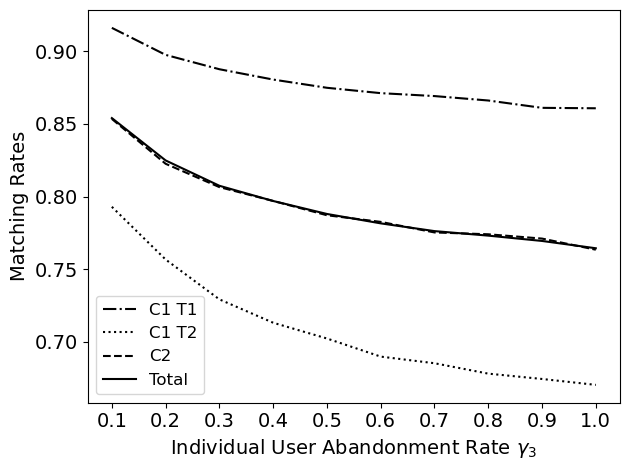

In [4]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_3$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(Abandonment_time, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Match_rates,  linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(Abandonment_time, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp5_Match.png')
plt.show()



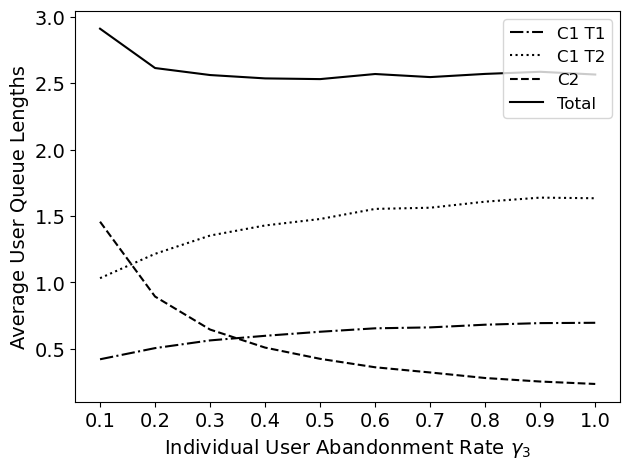

In [5]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_3$', fontsize=14)
plt.ylabel('Average User Queue Lengths', fontsize=14)
plt.plot(Abandonment_time, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(Abandonment_time, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp5_Queue.png')
plt.show()



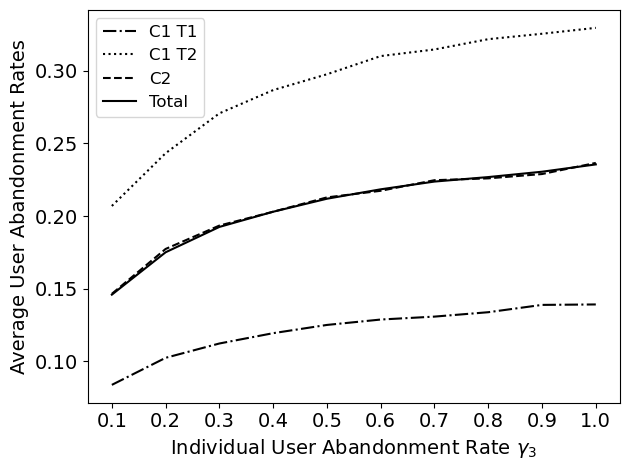

In [6]:
plt.xlabel(r'Individual User Abandonment Rate $\gamma_3$', fontsize=14)
plt.ylabel('Average User Abandonment Rates', fontsize=14)
plt.plot(Abandonment_time, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(Abandonment_time, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(Abandonment_time, Job_Abandon_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(Abandonment_time, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(Abandonment_time, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Exp5_Abandon.png')
plt.show()

